In [2]:
import numpy as np
import pandas as pd

In [3]:
gameData = pd.read_csv('malenia.csv')
gameData

,Host_Death_Time,Host_Build,Level,Phase,Waterflow_Death,Health_Pct,Location,Phantom_Count,Phantom_Build,Phantom_Death
0,299.0,RAW_MELEE,124.0,2.0,True,66.0,INNER,2.0,RAW_MELEE,True
1,261.0,HYBRID,169.0,2.0,True,92.0,CENTER,2.0,PROC_CAST,True
2,148.0,PROC_MELEE,179.0,1.0,True,93.0,INNER,1.0,NaN,NaN
3,247.0,RAW_CAST,141.0,2.0,False,89.0,INNER,2.0,RAW_MELEE,False
4,163.0,PROC_CAST,126.0,1.0,True,64.0,INNER,2.0,PROC_MELEE,True
...,...,...,...,...,...,...,...,...,...,...
3616,204.0,RAW_CAST,171.0,2.0,False,23.0,OUTER,1.0,NaN,NaN
3617,259.0,HYBRID,160.0,2.0,False,55.0,INNER,1.0,NaN,NaN
3618,288.0,PROC_CAST,173.0,2.0,False,60.0,INNER,2.0,HYBRID,True
3619,58.0,PROC_CAST,139.0,2.0,False,42.0,CENTER,1.0,NaN,NaN


In [31]:
gameData.describe()

,Host_Death_Time,Level,Phase,Health_Pct,Phantom_Count
count,3621.000000,3621.000000,3621.000000,3621.000000,3621.000000
mean,163.391605,149.898923,1.500690,48.916321,1.669705
std,80.437678,17.516393,0.500069,25.895421,0.470384
min,10.000000,120.000000,1.000000,6.000000,1.000000
25%,93.000000,135.000000,1.000000,26.000000,1.000000
50%,163.000000,150.000000,2.000000,49.000000,2.000000
75%,234.000000,165.000000,2.000000,71.000000,2.000000
max,300.000000,180.000000,2.000000,93.000000,2.000000


In [4]:
gameData['Host_Death_Time'].head(10).mean()

208.3

In [7]:
from scipy.stats import trim_mean as tm
tm(gameData['Level'].head(50),0.1)
tm([6.0, 8.1, 8.3, 9.1,9.9],0.2)

8.5

In [10]:
np.average(gameData['Level'].tail(25),weights=gameData['Health_Pct'].tail(25))

153.12603495860165

In [11]:
gameData['Level'].median()

150.0

In [32]:
from statistics import stdev
stdev(gameData['Level'])

17.516393314585166

{'whiskers': [<matplotlib.lines.Line2D at 0x1c6b7791b40>,
 'caps': [<matplotlib.lines.Line2D at 0x1c6b7793df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c6b7791870>],
 'medians': [<matplotlib.lines.Line2D at 0x1c6b7792290>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c6b7792500>],
 'means': []}

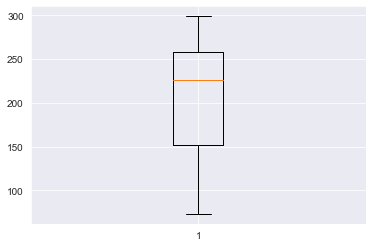

In [7]:
import matplotlib.pyplot as plt
lst = gameData['Host_Death_Time'].head(10)
plt.boxplot(lst)

(array([2., 1., 0., 2.]),
 array([124.  , 137.75, 151.5 , 165.25, 179.  ]),
 <BarContainer object of 4 artists>)

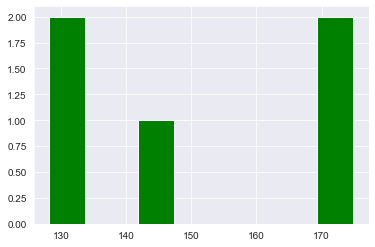

In [8]:
plt.hist(x = gameData['Level'].head(5), bins='auto', color = "green", rwidth=0.4)

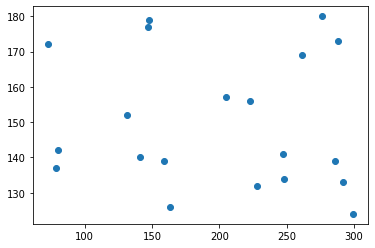

In [7]:
plt.scatter(x=gameData['Host_Death_Time'].head(20), y = gameData['Level'].head(20))

([<matplotlib.patches.Wedge at 0x128423bb1c0>,
 [Text(1.0636923192208887, 0.28028316044758583, '66.0'),
  Text(0.7123051035790848, 0.8382251722629127, '92.0'),
  Text(-0.020568751848142025, 1.0998076770269472, '93.0'),
  Text(-0.6947361982622212, 0.8528432533731833, '89.0'),
  Text(-1.0397724429518527, 0.358989229473443, '64.0'),
  Text(-1.0763410222518002, -0.2269140890688586, '40.0'),
  Text(-0.7565266088340075, -0.798540850630772, '49.0'),
  Text(-0.08220309805452111, -1.096924177265794, '86.0'),
  Text(0.5832987896527091, -0.9326105950447298, '12.0'),
  Text(1.0264462299022281, -0.395484686327426, '65.0')])

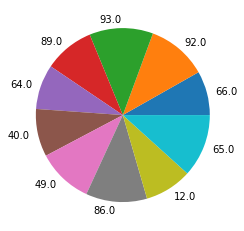

In [15]:
plt.pie(gameData['Level'].head(10),labels=gameData['Health_Pct'].head(10))

d:\mca\mca _2nd\python\python_mca_course\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Level', ylabel='Density'>

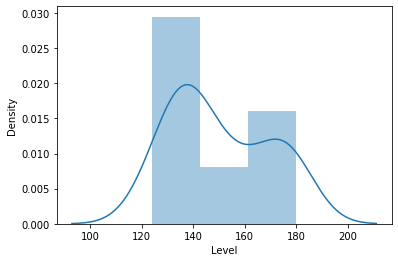

In [18]:
import seaborn as sb
sb.distplot(gameData['Level'].head(20))